In [1]:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

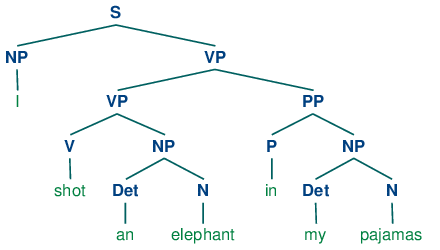

In [103]:
#1 
sentence = "I shot an elephant in my pajamas"
tokens = pos_tag(word_tokenize(sentence.lower()))

In [104]:
tokens

[('i', 'NN'),
 ('shot', 'VBD'),
 ('an', 'DT'),
 ('elephant', 'NN'),
 ('in', 'IN'),
 ('my', 'PRP$'),
 ('pajamas', 'NN')]

In [5]:
from nltk import RegexpParser

In [105]:
parseTree = RegexpParser("""
    Det: {<DT|PRP\$>}
    N: {<NN>}
    V: {<VBD>}
    P: {<IN>}
    NP: {<Det>?<N>}
    PP: {<P><NP>}
    VP: {<V><NP>}
    VP: {<VP><PP>}
""").parse(tokens)

In [8]:
for _ in parseTree.subtrees():
    print(_.label())
    print(_.leaves())

S
[('i', 'NN'), ('shot', 'VBD'), ('an', 'DT'), ('elephant', 'NN'), ('in', 'IN'), ('my', 'PRP$'), ('pajamas', 'NN')]
N
[('i', 'NN')]
NP
[('shot', 'VBD')]
V
[('shot', 'VBD')]
Det
[('an', 'DT')]
N
[('elephant', 'NN')]
P
[('in', 'IN')]
Det
[('my', 'PRP$')]
N
[('pajamas', 'NN')]


In [17]:
parseTree.draw()

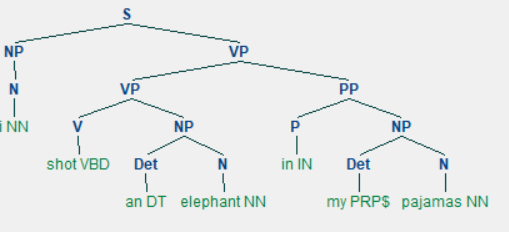

In [18]:
i = 0
for _ in parseTree.subtrees():
    if _.label() == "NP":
        i += 1
        print(_.label())
        print(_.leaves())

NP
[('i', 'NN')]
NP
[('an', 'DT'), ('elephant', 'NN')]
NP
[('my', 'PRP$'), ('pajamas', 'NN')]


In [19]:
i = 0
for _ in parseTree.subtrees():
    if _.label() == "NP":
        i += 1
        print(_.label())
        print(" ".join([_[0] for _ in _.leaves()]))

NP
i
NP
an elephant
NP
my pajamas


---

# Practices

In [246]:
sentence = "The dog saw a man in the park"

In [247]:
tokens = pos_tag(word_tokenize(sentence.lower()))

In [204]:
tokens

[('the', 'DT'),
 ('dog', 'NN'),
 ('saw', 'VBD'),
 ('a', 'DT'),
 ('man', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('park', 'NN')]

In [205]:
parseTree = RegexpParser("""
    Det: {<DT>}
    N: {<NN>}
    P: {<IN>}
    V: {<VBD>}
    NP: {<Det><N>}
    PP: {<P><NP>}
    NP: {<Det><N><PP>?}
    VP: {<V><NP>}""").parse(tokens)

In [206]:
parseTree.draw()

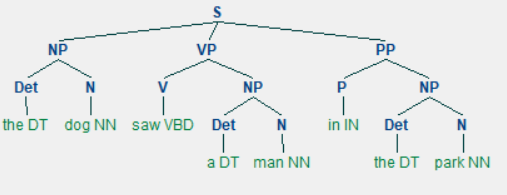
이건 실패...

PP가 NP 밑으로 들어가야하는데....

In [248]:
# 정답

parseTree = RegexpParser("""
    N: {<NN>}
    Det: {<DT>}
    V: {<V.*>}
    P: {<IN>}
    NP: {<Det><N>$}
    PP: {<P><NP>}
    NP: {<Det><N><PP>}
    NP: {<Det><N>}
    VP: {<V><NP>}
""").parse(tokens)

In [249]:
parseTree.draw()

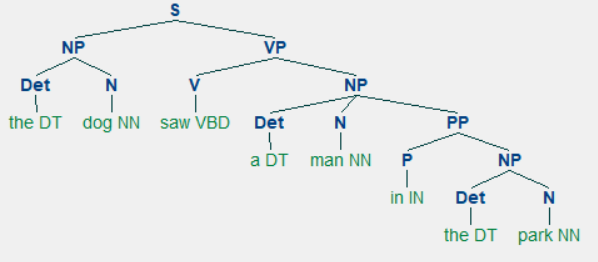

---

In [252]:
sentence2 = "The angry bear chased the frightened little squirrel"

In [253]:
tokens = pos_tag(word_tokenize(sentence2.lower()))

In [254]:
tokens

[('the', 'DT'),
 ('angry', 'JJ'),
 ('bear', 'NN'),
 ('chased', 'VBD'),
 ('the', 'DT'),
 ('frightened', 'JJ'),
 ('little', 'JJ'),
 ('squirrel', 'NN')]

In [257]:
parseTree = RegexpParser("""
    N: {<NN>}
    Adj: {<JJ>}
    Det: {<DT>}
    V: {<VBD>}
    Nom: {<Adj><N>}
    Nom: {<Adj><Nom>}
    NP: {<Det><Nom>}
    VP: {<V><NP>}
""").parse(tokens)

In [258]:
parseTree.draw()

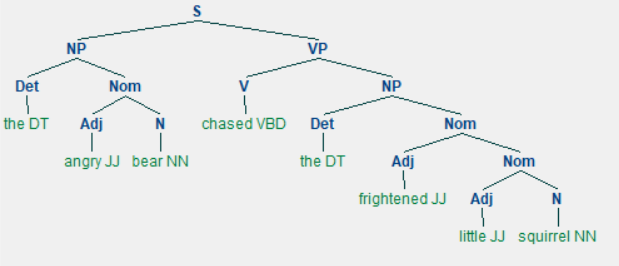
실패...

angry bear에서 bear가 Nom -> Nom -> N 이어야하는데...

In [243]:
# 정답

parseTree = RegexpParser("""
    N: {<NN>$}
    Det:{<DT>}
    V: {<V.*>}
    P: {<IN>}
    Adj: {<JJ>}
    Nom: {<Adj><N>}
    N: {<NN>}
    Nom: {<N>}
    Nom: {<Adj><Nom>}
    NP: {<Det><N.*>}
    PP: {<P><NP>}
    VP: {<V.*><.*P>}""").parse(tokens)

In [259]:
# 정답 이렇게해도 되나?

parseTree = RegexpParser("""
    N: {<NN>$}
    Det:{<DT>}
    V: {<VBD>}
    P: {<IN>}
    Adj: {<JJ>}
    Nom: {<Adj><N>}
    N: {<NN>}
    Nom: {<N>}
    Nom: {<Adj><Nom>}
    NP: {<Det><Nom>}
    PP: {<P><NP>}
    VP: {<VBD><.*P>}""").parse(tokens)

In [260]:
parseTree.draw()

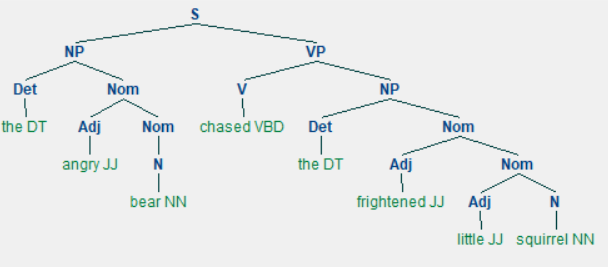

---

In [227]:
# fat은 Adj로 안 나올것이다. 내부적인 요소에 의한 것이므로 무시해도 됨.
# 빼거나 N으로 두면 된다.

sentnece3 = "The little bear saw the fine fat trout in the brook"

In [228]:
tokens = pos_tag(word_tokenize(sentnece3))

In [229]:
tokens

[('The', 'DT'),
 ('little', 'JJ'),
 ('bear', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('fine', 'JJ'),
 ('fat', 'NN'),
 ('trout', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('brook', 'NN')]

In [230]:
parseTree = RegexpParser("""
    N: {<NN>}
    Adj: {<JJ>}
    Det: {<DT>}
    V: {<VBD>}
    P: {<IN>}
    Nom: {<Adj>?<N>+}
    NP: {<Det><Nom>}
    PP: {<P><NP>}
    VP: {<V><NP>}
    VP: {<VP><PP>}
""").parse(tokens)

In [231]:
parseTree.draw()

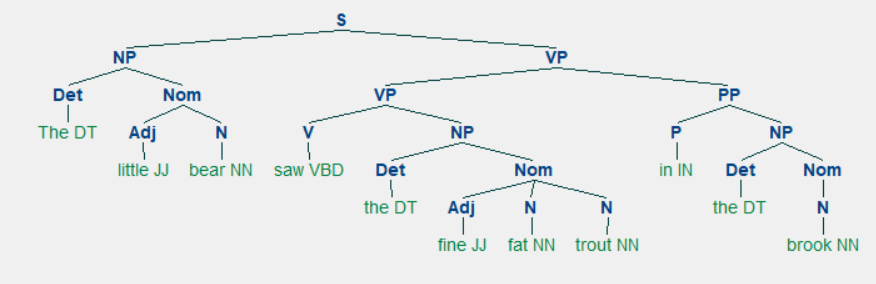

이건 성공 (fat은 어쩔수 없음)

---


- https://nlp.stanford.edu/software/tagger.html#Download
- full version 다운로드

In [265]:
# Look up Error 나면 이거 실행.
# jdk 버전은 본인 PC에 맞춰서 변경.

# import os
# java_path = "C:/Program Files/Java/jdk1.8.0_221/bin/java.exe"
# os.environ['JAVAHOME'] = java_path

In [261]:
from nltk.tag import StanfordPOSTagger

In [262]:
MODEL = "stanford-postagger-full-2018-10-16/models/english-bidirectional-distsim.tagger"
PASER = "stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2.jar"

pos_stanford = StanfordPOSTagger(MODEL, PASER)

In [274]:
# nltk 형태소 분석기는 fat을 명사로 인식했었다.
sentence = "the little bear saw the fine fat trout in the brook"
tokens = pos_stanford.tag(word_tokenize(sentence))

In [275]:
# fat을 JJ(Adj)로 인식했다. 
# nltk 형태소 분석기보다 stanford 형태소 분석기가 성능이 더 좋다.

tokens

[('the', 'DT'),
 ('little', 'JJ'),
 ('bear', 'NN'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('fine', 'JJ'),
 ('fat', 'JJ'),
 ('trout', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('brook', 'NN')]

In [278]:
parseTree = RegexpParser("""
    Adj: {<JJ>}
    N: {<NN.*>}
    Det: {<PRP\$>|<D.*>}
    V: {<V.*>}
    P: {<IN>}
    Nom: {<Adj>*<N>*}
    NP: {<Det><Nom>}
    PP: {<P><NP>}
    VP: {<V><NP>}
    VP: {<VP><PP>}
""").parse(tokens)

In [280]:
parseTree.draw()

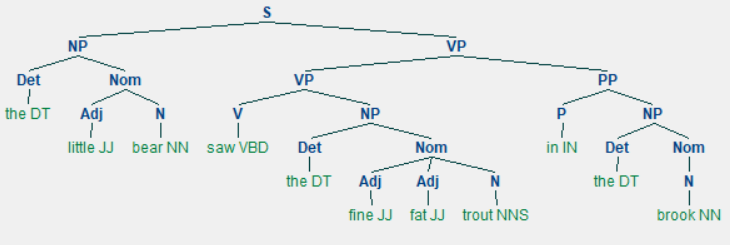

### 강의안 다운로드
- www.cs.virginia.edu/~hw5x/Course/IR2015/_site/lectures/
- https://nlp.stanford.edu/IR-book/newslides.html